In [13]:
import numpy as np
import matplotlib as mpl
from matplotlib import pyplot as plt
from astropy.io import fits
from astropy import constants as c, units as u
from astropy import cosmology
from astropy.wcs import WCS
from scipy.ndimage.filters import gaussian_filter
from astropy.convolution import Gaussian2DKernel
from astropy.convolution import convolve
from matplotlib.patches import Rectangle
import seaborn as sns

In [14]:
sns.set_style("ticks", {"xtick.direction": u"in", "ytick.direction": u"in"})
fontsize = 12
plt.rc("font", **{"family": "sans-serif", "serif": ["Arial"]})
plt.rc("xtick", labelsize=fontsize)
plt.rc("ytick", labelsize=fontsize)

# get images and trim
x1 = 680
x2 = 900
y1 = 680
y2 = 900

f606 = fits.open("J1059_F606W_sci.fits")
wcs606 = WCS(f606[0].header)
im606 = (
    f606[0].data[y1:y2, x1:x2]
    * f606[0].header["PHOTFLAM"]
    * u.erg
    / u.s
    / u.cm ** 2
    / u.angstrom
)
f606s = fits.open("J1059_F606W_sig.fits")
sig606 = (
    f606s[0].data[y1:y2, x1:x2]
    * f606[0].header["PHOTFLAM"]
    * u.erg
    / u.s
    / u.cm ** 2
    / u.angstrom
)
f606wave = f606[0].header["PHOTPLAM"]

f814 = fits.open("J1059_F814W_sci.fits")
wcs814 = WCS(f814[0].header)
im814 = (
    f814[0].data[y1:y2, x1:x2]
    * f814[0].header["PHOTFLAM"]
    * u.erg
    / u.s
    / u.cm ** 2
    / u.angstrom
)
f814s = fits.open("J1059_F814W_sig.fits")
sig814 = (
    f814s[0].data[y1:y2, x1:x2]
    * f814[0].header["PHOTFLAM"]
    * u.erg
    / u.s
    / u.cm ** 2
    / u.angstrom
)
f814wave = f814[0].header["PHOTPLAM"]

f125 = fits.open("J1059_F125W_sci.fits")
wcs125 = WCS(f125[0].header)
im125 = (
    f125[0].data[y1:y2, x1:x2]
    * f125[0].header["PHOTFLAM"]
    * u.erg
    / u.s
    / u.cm ** 2
    / u.angstrom
)
f125s = fits.open("J1059_F125W_sig.fits")
sig125 = (
    f125s[0].data[y1:y2, x1:x2]
    * f125[0].header["PHOTFLAM"]
    * u.erg
    / u.s
    / u.cm ** 2
    / u.angstrom
)
f125wave = f125[0].header["PHOTPLAM"]

f160 = fits.open("J1059_F160W_sci.fits")
wcs160 = WCS(f160[0].header)
im160 = (
    f160[0].data[y1:y2, x1:x2]
    * f160[0].header["PHOTFLAM"]
    * u.erg
    / u.s
    / u.cm ** 2
    / u.angstrom
)
f160s = fits.open("J1059_F160W_sig.fits")
sig160 = (
    f160s[0].data[y1:y2, x1:x2]
    * f160[0].header["PHOTFLAM"]
    * u.erg
    / u.s
    / u.cm ** 2
    / u.angstrom
)
f160wave = f160[0].header["PHOTPLAM"]

pixscale = f606[0].header["CD2_2"] * 3600 * u.arcsec


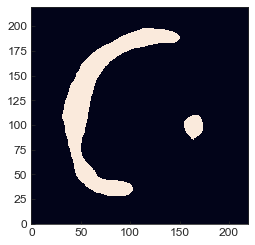

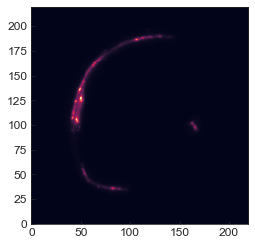

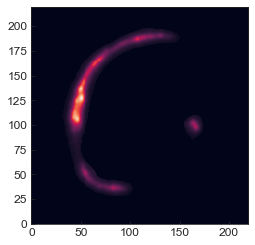

In [15]:
# make a mask to isolate the arc to do photometry
# smooth with a Gaussian filter
kernel = Gaussian2DKernel(x_stddev=2)
im606s = convolve(im606, kernel)
sig606s = convolve(sig606, kernel)
im814s = convolve(im814, kernel)
sig814s = convolve(sig814, kernel)
im125s = convolve(im125, kernel)
sig125s = convolve(sig125, kernel)
im160s = convolve(im160, kernel)
sig160s = convolve(sig160, kernel)

photmask = np.ones(np.shape(im606))
photmask[(im606s / sig606s < 2.5)] = 0


photmask[198:220, :] = 0
photmask[54:85, 64:90] = 0
photmask[59:62, 61:65] = 0
photmask[106:139, 104:148] = 0
# this mask includes arc and counterimage
# also get mask for arc only
arcmask = photmask.copy()
arcmask[80:113, 150:175] = 0

# include counter-image in photometry
includecounter = True
if includecounter:
    mask = photmask
else:
    mask = arcmask

plt.figure(num=1)
plt.clf()

plt.imshow(mask, origin="lower")

plt.figure(num=2)
plt.clf()

plt.imshow((im606 * mask).value, origin="lower")

plt.figure(num=3)
plt.clf()
plt.imshow((im160 * mask).value, origin="lower")



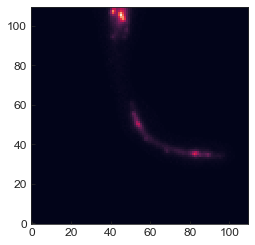

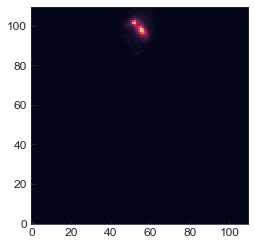

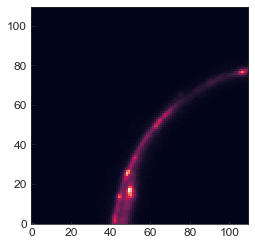

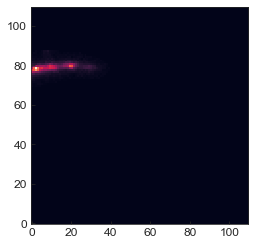

In [17]:
dat606 = (im606 * mask).value
dat814 = (im814 * mask).value
dat125 = (im160 * mask).value
dat160 = (im125 * mask).value

M1 = dat606.shape[0]//2
N1 = dat606.shape[1]//2
M2 = dat814.shape[0]//2
N2 = dat814.shape[1]//2
M3 = dat160.shape[0]//2
N3 = dat160.shape[1]//2
M4 = dat125.shape[0]//2
N4 = dat125.shape[1]//2

tiles606 = [dat606[x:x+M1,y:y+N1] for x in range(0,dat606.shape[0],M1) for y in range(0,dat606.shape[1],N1)]
tiles814 = [dat814[x:x+M2,y:y+N2] for x in range(0,dat814.shape[0],M2) for y in range(0,dat814.shape[1],N2)]
tiles125 = [dat125[x:x+M3,y:y+N3] for x in range(0,dat125.shape[0],M3) for y in range(0,dat125.shape[1],N3)]
tiles160 = [dat160[x:x+M4,y:y+N4] for x in range(0,dat160.shape[0],M4) for y in range(0,dat160.shape[1],N4)]

plt.figure(num=1)
plt.clf()
plt.imshow(tiles606[0],origin='lower')

plt.figure(num=2)
plt.clf()
plt.imshow(tiles606[1],origin='lower')

plt.figure(num=3)
plt.clf()
plt.imshow(tiles606[2],origin='lower')

plt.figure(num=4)
plt.clf()
plt.imshow(tiles606[3],origin='lower')


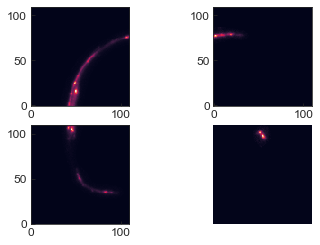

In [77]:
fig, ax = plt.subplots(2,2)
ax[0,0].imshow(tiles606[2],origin='lower');
ax[0,1].imshow(tiles606[3],origin='lower');
ax[1,0].imshow(tiles606[0],origin='lower');
ax[1,1].imshow(tiles606[1],origin='lower');
plt.axis('off')
plt.savefig("test3.png", bbox_inches=0)


In [19]:
for i in range(4):
    tiles606[i] = (tiles606[i] * u.erg/ u.s/ u.cm ** 2/ u.angstrom)
    tiles814[i] = (tiles814[i] * u.erg/ u.s/ u.cm ** 2/ u.angstrom)
    tiles125[i] = (tiles125[i] * u.erg/ u.s/ u.cm ** 2/ u.angstrom)
    tiles160[i] = (tiles160[i] * u.erg/ u.s/ u.cm ** 2/ u.angstrom)

for i in range(4):
    tiles606[i] = (tiles606[i].value * u.erg/ u.s/ u.cm ** 2/ u.angstrom)
    tiles814[i] = (tiles814[i].value * u.erg/ u.s/ u.cm ** 2/ u.angstrom)
    tiles125[i] = (tiles125[i].value * u.erg/ u.s/ u.cm ** 2/ u.angstrom)
    tiles160[i] = (tiles160[i].value * u.erg/ u.s/ u.cm ** 2/ u.angstrom)

In [89]:
#im606 * mask

In [20]:
flam_f606w = (tiles606[0]).sum()
flamerr_f606w = np.sqrt((sig606 ** 2 * mask).sum())
fnu_f606w = flam_f606w.to(
    u.uJy, equivalencies=u.spectral_density(f606wave * u.angstrom)
)
mab_f606w = fnu_f606w.to(u.ABmag)
fnuerr_f606w = flamerr_f606w.to(
    u.uJy, equivalencies=u.spectral_density(f606wave * u.angstrom)
)
maberr_f606w = 2.5 * np.log10(np.e) * fnuerr_f606w / fnu_f606w

flam_f814w = (tiles814[0]).sum()
flamerr_f814w = np.sqrt((sig814 ** 2 * mask).sum())
fnu_f814w = flam_f814w.to(
    u.uJy, equivalencies=u.spectral_density(f814wave * u.angstrom)
)
mab_f814w = fnu_f814w.to(u.ABmag)
fnuerr_f814w = flamerr_f814w.to(
    u.uJy, equivalencies=u.spectral_density(f814wave * u.angstrom)
)
maberr_f814w = 2.5 * np.log10(np.e) * fnuerr_f814w / fnu_f814w

flam_f125w = (tiles125[0]).sum()
flamerr_f125w = np.sqrt((sig125 ** 2 * mask).sum())
fnu_f125w = flam_f125w.to(
    u.uJy, equivalencies=u.spectral_density(f125wave * u.angstrom)
)
mab_f125w = fnu_f125w.to(u.ABmag)
fnuerr_f125w = flamerr_f125w.to(
    u.uJy, equivalencies=u.spectral_density(f125wave * u.angstrom)
)
maberr_f125w = 2.5 * np.log10(np.e) * fnuerr_f125w / fnu_f125w

flam_f160w = (tiles160[0]).sum()
flamerr_f160w = np.sqrt((sig160 ** 2 * mask).sum())
fnu_f160w = flam_f160w.to(
    u.uJy, equivalencies=u.spectral_density(f160wave * u.angstrom)
)
mab_f160w = fnu_f160w.to(u.ABmag)
fnuerr_f160w = flamerr_f160w.to(
    u.uJy, equivalencies=u.spectral_density(f160wave * u.angstrom)
)
maberr_f160w = 2.5 * np.log10(np.e) * fnuerr_f160w / fnu_f160w

print("F606W = %3.2f +/- %4.3f" % (mab_f606w.value, maberr_f606w.value))
print("F814W = %3.2f +/- %4.3f" % (mab_f814w.value, maberr_f814w.value))
print("F125W = %3.2f +/- %4.3f" % (mab_f125w.value, maberr_f125w.value))
print("F160W = %3.2f +/- %4.3f" % (mab_f160w.value, maberr_f160w.value))
print("\n")

F606W = 20.40 +/- 0.004
F814W = 20.20 +/- 0.006
F125W = 20.21 +/- 0.009
F160W = 19.61 +/- 0.007




In [22]:
mab_f606w_arr,mab_f814w_arr,mab_f125w_arr,mab_f160w_arr = (np.empty(0) for i in range(4))

for i in range(4):
    
    flam_f606w = (tiles606[i]).sum()
    flamerr_f606w = np.sqrt((sig606 ** 2 * mask).sum())
    fnu_f606w = flam_f606w.to(
        u.uJy, equivalencies=u.spectral_density(f606wave * u.angstrom)
    )
    mab_f606w = fnu_f606w.to(u.ABmag)
    fnuerr_f606w = flamerr_f606w.to(
        u.uJy, equivalencies=u.spectral_density(f606wave * u.angstrom)
    )
    maberr_f606w = 2.5 * np.log10(np.e) * fnuerr_f606w / fnu_f606w
    
    flam_f814w = (tiles814[i]).sum()
    flamerr_f814w = np.sqrt((sig814 ** 2 * mask).sum())
    fnu_f814w = flam_f814w.to(
        u.uJy, equivalencies=u.spectral_density(f814wave * u.angstrom)
    )
    mab_f814w = fnu_f814w.to(u.ABmag)
    fnuerr_f814w = flamerr_f814w.to(
        u.uJy, equivalencies=u.spectral_density(f814wave * u.angstrom)
    )
    maberr_f814w = 2.5 * np.log10(np.e) * fnuerr_f814w / fnu_f814w
    
    flam_f125w = (tiles125[i]).sum()
    flamerr_f125w = np.sqrt((sig125 ** 2 * mask).sum())
    fnu_f125w = flam_f125w.to(
        u.uJy, equivalencies=u.spectral_density(f125wave * u.angstrom)
    )
    mab_f125w = fnu_f125w.to(u.ABmag)
    fnuerr_f125w = flamerr_f125w.to(
        u.uJy, equivalencies=u.spectral_density(f125wave * u.angstrom)
    )
    maberr_f125w = 2.5 * np.log10(np.e) * fnuerr_f125w / fnu_f125w
    
    flam_f160w = (tiles160[i]).sum()
    flamerr_f160w = np.sqrt((sig160 ** 2 * mask).sum())
    fnu_f160w = flam_f160w.to(
        u.uJy, equivalencies=u.spectral_density(f160wave * u.angstrom)
    )
    mab_f160w = fnu_f160w.to(u.ABmag)
    fnuerr_f160w = flamerr_f160w.to(
        u.uJy, equivalencies=u.spectral_density(f160wave * u.angstrom)
    )
    maberr_f160w = 2.5 * np.log10(np.e) * fnuerr_f160w / fnu_f160w
    
    print("F606W = %3.2f +/- %4.3f" % (mab_f606w.value, maberr_f606w.value))
    print("F814W = %3.2f +/- %4.3f" % (mab_f814w.value, maberr_f814w.value))
    print("F125W = %3.2f +/- %4.3f" % (mab_f125w.value, maberr_f125w.value))
    print("F160W = %3.2f +/- %4.3f" % (mab_f160w.value, maberr_f160w.value))
    print("\n")
    
    mab_f606w_arr = np.append(mab_f606w_arr,mab_f606w.value)
    mab_f814w_arr = np.append(mab_f814w_arr,mab_f814w.value)
    mab_f125w_arr = np.append(mab_f125w_arr,mab_f125w.value)
    mab_f160w_arr = np.append(mab_f160w_arr,mab_f160w.value)

F606W = 20.40 +/- 0.004
F814W = 20.20 +/- 0.006
F125W = 20.21 +/- 0.009
F160W = 19.61 +/- 0.007


F606W = 22.31 +/- 0.021
F814W = 22.10 +/- 0.032
F125W = 22.06 +/- 0.047
F160W = 21.51 +/- 0.037


F606W = 19.62 +/- 0.002
F814W = 19.42 +/- 0.003
F125W = 19.53 +/- 0.005
F160W = 18.93 +/- 0.003


F606W = 21.79 +/- 0.013
F814W = 21.59 +/- 0.020
F125W = 21.62 +/- 0.032
F160W = 21.07 +/- 0.025




In [23]:
color_uvs = mab_f606w_arr-mab_f814w_arr
color_os = mab_f125w_arr-mab_f160w_arr

print(color_os)

for i in range(4):
    print("For tile %1.0f color_uvs = %3.4f and color_os = %3.4f" % (i,color_uvs[i],color_os[i]))

[0.6008327  0.55020258 0.60421868 0.54916602]
For tile 0 color_uvs = 0.2072 and color_os = 0.6008
For tile 1 color_uvs = 0.2154 and color_os = 0.5502
For tile 2 color_uvs = 0.2005 and color_os = 0.6042
For tile 3 color_uvs = 0.1987 and color_os = 0.5492


In [ ]:
### calculate star formation rate ###
muv = mab_f606w.value
# magnification
mu = 130
mu_mag = 2.5 * np.log10(mu)
muv = (muv + mu_mag) * u.ABmag
z = 2.796
A_UV = 1.52

# test using values from Marques-Chaves et al 2020
test = False
if test:
    muv = 21.11 - 0.07  # galactic extinction correction
    mu = 14
    mu_mag = 2.5 * np.log10(mu)
    muv = (muv + mu_mag) * u.ABmag
    z = 2.6345
    A_UV = 1.55

cosmo = cosmology.Planck15
cosmo = cosmology.FlatLambdaCDM(Om0=0.274, H0=70)
dL = cosmo.luminosity_distance(z)

M_UV = (
    muv.value
    - 5 * np.log10(dL.to(u.pc).value)
    + 5
    + 2.5 * np.log10(1 + z)
    # + 2.5 * np.log10(mu)
) * u.ABmag

F_nu = muv.to(u.erg / u.s / u.cm ** 2 / u.Hz)
# factor of (1+z) because these aren't bolometric fluxes and luminosities
L_nu = (F_nu * 4 * np.pi * dL ** 2 / (1 + z)).to(u.erg / u.s / u.Hz)

# divide by 1.8 for IMF
SFR_uncorr = 1.48e-28 * (u.solMass / u.yr / (u.erg / u.s / u.Hz)) * L_nu / 1.8
SFR_corr = SFR_uncorr * 10 ** (0.4 * A_UV)

print("M_UV = {0:4.2f}".format(M_UV))
print("SFR without extinction correction = {0:4.1f}".format(SFR_uncorr))
print("Extinction-corrected SFR = {0:4.1f}".format(SFR_corr))
print("\n")


In [ ]:
### photometry for SED fitting

# correct for magnification
m606w = (mab_f606w.value + mu_mag) * u.ABmag
m814w = (mab_f814w.value + mu_mag) * u.ABmag
m125w = (mab_f125w.value + mu_mag) * u.ABmag
m160w = (mab_f160w.value + mu_mag) * u.ABmag
print("Lensing-corrected photometry:")
print("F606W = %3.2f +/- %4.3f" % (m606w.value, maberr_f606w.value))
print("F814W = %3.2f +/- %4.3f" % (m814w.value, maberr_f814w.value))
print("F125W = %3.2f +/- %4.3f" % (m125w.value, maberr_f125w.value))
print("F160W = %3.2f +/- %4.3f" % (m160w.value, maberr_f160w.value))
print("\n")

# convert to maggies for prospector SED-fitting code
zp = u.zero_point_flux(3631.0 * u.Jy)
maggy606 = m606w.to(u.maggy, zp)
maggy814 = m814w.to(u.maggy, zp)
maggy125 = m125w.to(u.maggy, zp)
maggy160 = m160w.to(u.maggy, zp)
# errors
maggy606err = maberr_f606w * maggy606 / (2.5 * np.log10(np.e))
maggy814err = maberr_f814w * maggy814 / (2.5 * np.log10(np.e))
maggy125err = maberr_f125w * maggy125 / (2.5 * np.log10(np.e))
maggy160err = maberr_f160w * maggy160 / (2.5 * np.log10(np.e))

print("Photometry for prospector fitting in maggies:")
print("F606W = %5.4e +/- %5.4e" % (maggy606.value, maggy606err.value))
print("F814W = %5.4e +/- %5.4e" % (maggy814.value, maggy814err.value))
print("F125W = %5.4e +/- %5.4e" % (maggy125.value, maggy125err.value))
print("F160W = %5.4e +/- %5.4e" % (maggy160.value, maggy160err.value))

plt.show()


In [ ]:
color_uvs = m814w.value-m606w.value
color_os = m160w.value-m125w.value

print(color_uvs,color_os)